<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-7

Decision trees and KNN

In [21]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class $-1$ in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

---
Entropy of a node is:
$$
  H(p) = -p ⋅ log_2(p) - (1-p) ⋅ log_2(1-p)
$$

where $p$ is the proportion of data points belonging to class $-1$

In [22]:
### Solution ###
def entropy(p):
  return -p * np.log2(p) - (1-p) * np.log2(1-p)

p_parent = 200/1000
entropy(p_parent)

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

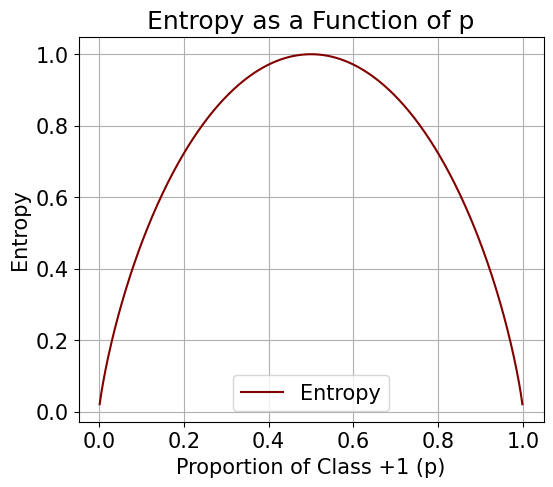

In [23]:
### Solution ###
# Generate values for p from 0 to 1
p_values = np.linspace(0, 1, 500)
entropy_values = [entropy(p) for p in p_values]

plt.figure(figsize=(6, 5))
plt.plot(p_values, entropy_values, label="Entropy", color="maroon")
plt.title("Entropy as a Function of p")
plt.xlabel("Proportion of Class +1 (p)")
plt.ylabel("Entropy")
plt.grid(True)
plt.legend()
plt.show()

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [24]:
### Solution ###
def IG(E, El, Er, gamma):
  return E - (gamma * El + (1 - gamma) * Er)

parent_proportion = 200/1000
E = entropy(parent_proportion)

left_child_proportion = 50/100
El = entropy(left_child_proportion)

right_child_proportion = (200 - 50)/(1000 - 100)
Er = entropy(right_child_proportion)

gamma = 100/1000

IG(E, El, Er, gamma)

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

---
**Given Data**
- Proportion of class $+1$ in $Q = 0.4$
   
  Total $+1$ class points in $Q$ = $1000 \cdot 0.4 = 400$
- Proportion of data points in $L = \gamma = 0.7$

  Total points in $L = 1000 \cdot 0.7 = 700$

  Total points in $R = 1000 - 700 = 300$

**Conditions**
- Class $+1$ points in $L$ cannot exceed tha total points in $L$.
$$ q \cdot 700 \le 400 $$

- Similarly, class $+1$ points in $L$ must be non-negative:
$$ q \cdot 700 \ge 0 $$

Thus, the range of $q$ will be determined by:
$$
q_{min} = max \left(0, \frac{400 - 300}{700} \right),
q_{max} = min \left(1, \frac{400}{700} \right)
$$


In [25]:
### Solution ###
total_points = 1000
q_Q = 0.4  # Proportion of class +1 in Q
gamma = 0.7  # Proportion of points in L

class1_points_Q = total_points * q_Q  # Total class +1 points in Q
total_points_L = total_points * gamma  # Total points in L
total_points_R = total_points - total_points_L  # Total points in R

q_min = max(0, (class1_points_Q - total_points_R) / total_points_L)
q_max = min(1, class1_points_Q / total_points_L)

print(f"q_min: {q_min:.4f}, q_max: {q_max:.4f}")

q_min: 0.1429, q_max: 0.5714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

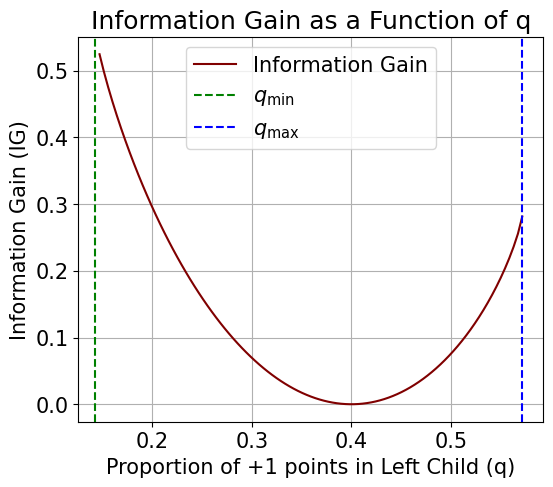

In [26]:
### Solution ###
E_Q = entropy(q_Q)      # Parent node entropy
q_values = np.linspace(q_min, q_max, 100)       # Values for q

# Calculate information gain for each q
IG_values = [IG(E_Q, entropy(q), entropy((q_Q - gamma * q) / (1 - gamma)), gamma) for q in q_values]

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(q_values, IG_values, label="Information Gain", color='maroon')
plt.xlabel("Proportion of +1 points in Left Child (q)")
plt.ylabel("Information Gain (IG)")
plt.title("Information Gain as a Function of q")
plt.axvline(q_min, color='green', linestyle='--', label="$q_{\min}$")
plt.axvline(q_max, color='blue', linestyle='--', label="$q_{\max}$")
plt.legend()
plt.grid()
plt.show()

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [27]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

In [28]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


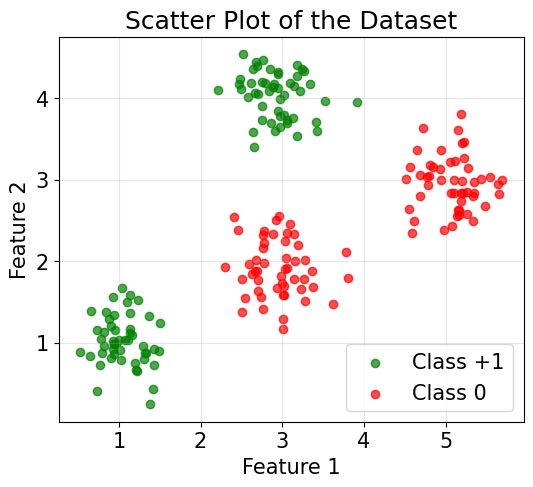

In [29]:
### Solution ###
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', alpha=0.7)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Dataset")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [30]:
### Solution ###
def best_split(X, y):
    """
    Find the best feature index and threshold for splitting the data.
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Label vector of shape (n_samples,)
    Returns:
        A tuple (feat_best, value_best, ig_best) representing the best feature index,
        threshold, and information gain.
    """
    n_samples, n_features = X.shape
    best_ig = -np.inf
    feat_best = None
    value_best = None

    # Entropy of the root node (parent)
    p_root = np.mean(y)
    E_root = entropy(p_root)

    for feature in range(n_features):
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = X[sorted_indices]
        y_sorted = y[sorted_indices]

        for i in range(1, n_samples):  # Try all split points
            theta = (X_sorted[i - 1, feature] + X_sorted[i, feature]) / 2

            # Split data
            left_mask = X_sorted[:, feature] < theta
            right_mask = ~left_mask

            # Entropies for child nodes
            p_left = np.mean(y_sorted[left_mask]) if np.any(left_mask) else 0
            p_right = np.mean(y_sorted[right_mask]) if np.any(right_mask) else 0

            E_left = entropy(p_left)
            E_right = entropy(p_right)
            gamma = np.mean(left_mask)

            info_gain = IG(E_root, E_left, E_right, gamma)

            # Checking if this is the best split so far
            if info_gain > best_ig:
                best_ig = info_gain
                feat_best = feature
                value_best = theta

    return feat_best, value_best, best_ig

feat_best, value_best, ig_best = best_split(X, y)
print(f"Best Feature Index: {feat_best}")
print(f"Best Threshold (θ): {value_best}")
print(f"Information Gain: {ig_best}")

Best Feature Index: 0
Best Threshold (θ): 3.5715745512082093
Information Gain: 0.3023672739763503


### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [31]:
### Solution ###
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # Index of the feature to split on
        self.threshold = threshold    # Threshold value for the split
        self.left = left              # Left child (subtree)
        self.right = right            # Right child (subtree)
        self.value = value            # Class label for leaf nodes

def grow_tree(X, y, max_depth=None, min_samples_split=2):
    """
    Recursively grow a decision tree.
    Args:
        X: Feature matrix (n_samples, n_features)
        y: Label vector (n_samples,)
        max_depth: Maximum depth of the tree
        min_samples_split: Minimum number of samples required to split a node
    Returns:
        root: The root node of the decision tree
    """
    n_samples, n_features = X.shape

    # Stopping conditions - If all labels are the same, return a leaf node
    if n_samples < min_samples_split or max_depth == 0 or np.all(y == y[0]):
        return DecisionTreeNode(value=np.mean(y))

    feat_best, value_best, _ = best_split(X, y)         # Finding the best split

    if feat_best is None or value_best is None:
        return DecisionTreeNode(value=np.mean(y))  # Return a leaf node if no split is found

    left_mask = X[:, feat_best] < value_best
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Recursively grow the left and right subtrees
    left_subtree = grow_tree(X_left, y_left, max_depth-1 if max_depth else None, min_samples_split)
    right_subtree = grow_tree(X_right, y_right, max_depth-1 if max_depth else None, min_samples_split)

    # Return the current node
    return DecisionTreeNode(feature=feat_best, threshold=value_best, left=left_subtree, right=right_subtree)

def count_nodes(node):
    """
    Count the number of internal and leaf nodes in the tree.
    Args:
        node: The root node of the tree
    Returns:
        internal_nodes: The number of internal nodes
        leaf_nodes: The number of leaf nodes
    """
    if node is None:
        return 0, 0

    if node.value is not None:  # Leaf node
        return 0, 1

    left_internal, left_leaf = count_nodes(node.left)
    right_internal, right_leaf = count_nodes(node.right)

    internal_nodes = 1 + left_internal + right_internal
    leaf_nodes = left_leaf + right_leaf

    return internal_nodes, leaf_nodes

tree_root = grow_tree(X, y, max_depth=3)
internal_nodes, leaf_nodes = count_nodes(tree_root)

print(f"Number of internal nodes: {internal_nodes}")
print(f"Number of leaf nodes: {leaf_nodes}")

Number of internal nodes: 3
Number of leaf nodes: 4


### Problem-9

Predict the label of the point $(3, 4)$.

In [32]:
### Solution ###
def predict(node, point):
    """
    Predict the label for a given point.
    Args:
        node: The root node of the tree (or current node in recursion).
        point: The point for which we are predicting the label (a 1D array).
    Returns:
        The predicted label i.e., value at the leaf node.
    """
    if node.value is not None:  # Leaf node
        return 1 if node.value >= 0.5 else 0

    # Compare the point's feature with the threshold at the current node
    if point[node.feature] < node.threshold:
        return predict(node.left, point)
    else:
        return predict(node.right, point)

point = np.array([3, 4])
predicted_label = predict(tree_root, point)

print(f"The predicted label for the point {point} is: {predicted_label}")

The predicted label for the point [3 4] is: 0


### Problem-10

Plot the decision boundary.

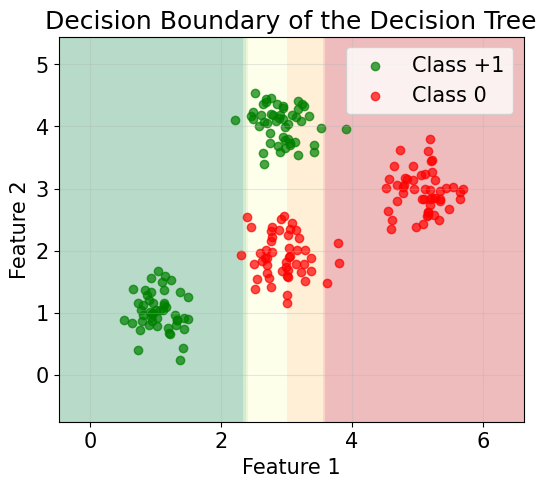

In [33]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

def predict(node, X):
    """
    Predict the class labels for the given data points using the decision tree.
    Args:
        node: The root node of the decision tree
        X: Feature matrix (n_samples, n_features)
    Returns:
        predictions: Predicted class labels for each sample in X
    """
    if node.value is not None:  # Leaf node
        return np.full(X.shape[0], node.value)

    left_mask = X[:, node.feature] < node.threshold
    right_mask = ~left_mask

    predictions = np.empty(X.shape[0])
    predictions[left_mask] = predict(node.left, X[left_mask])
    predictions[right_mask] = predict(node.right, X[right_mask])

    return predictions

# Generate the mesh grid for the decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the mesh grid
Z = predict(tree_root, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', alpha=0.7)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of the Decision Tree")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## KNN


In [34]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

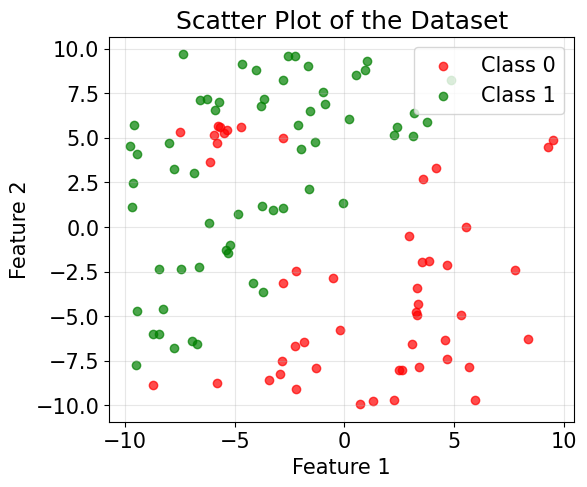

In [35]:
### Solution ###
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Dataset")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [36]:
### Solution ###
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict(X, y, x_test, k):
    distances = np.array([euclidean_distance(x, x_test) for x in X])      # distance between x_text and all Xs
    nearest_neighbors_indices = np.argsort(distances)[:k]                 # consider k nearest ones
    nearest_labels = y[nearest_neighbors_indices]
    unique, counts = np.unique(nearest_labels, return_counts=True)
    return unique[np.argmax(counts)]

# Testing for (-3, -2) with k=10
x_test = np.array([-3, -2])
k = 10
predicted_label = predict(X, y, x_test, k)

print(f"Predicted label for the point (-3, -2): {predicted_label}")

Predicted label for the point (-3, -2): 1


### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

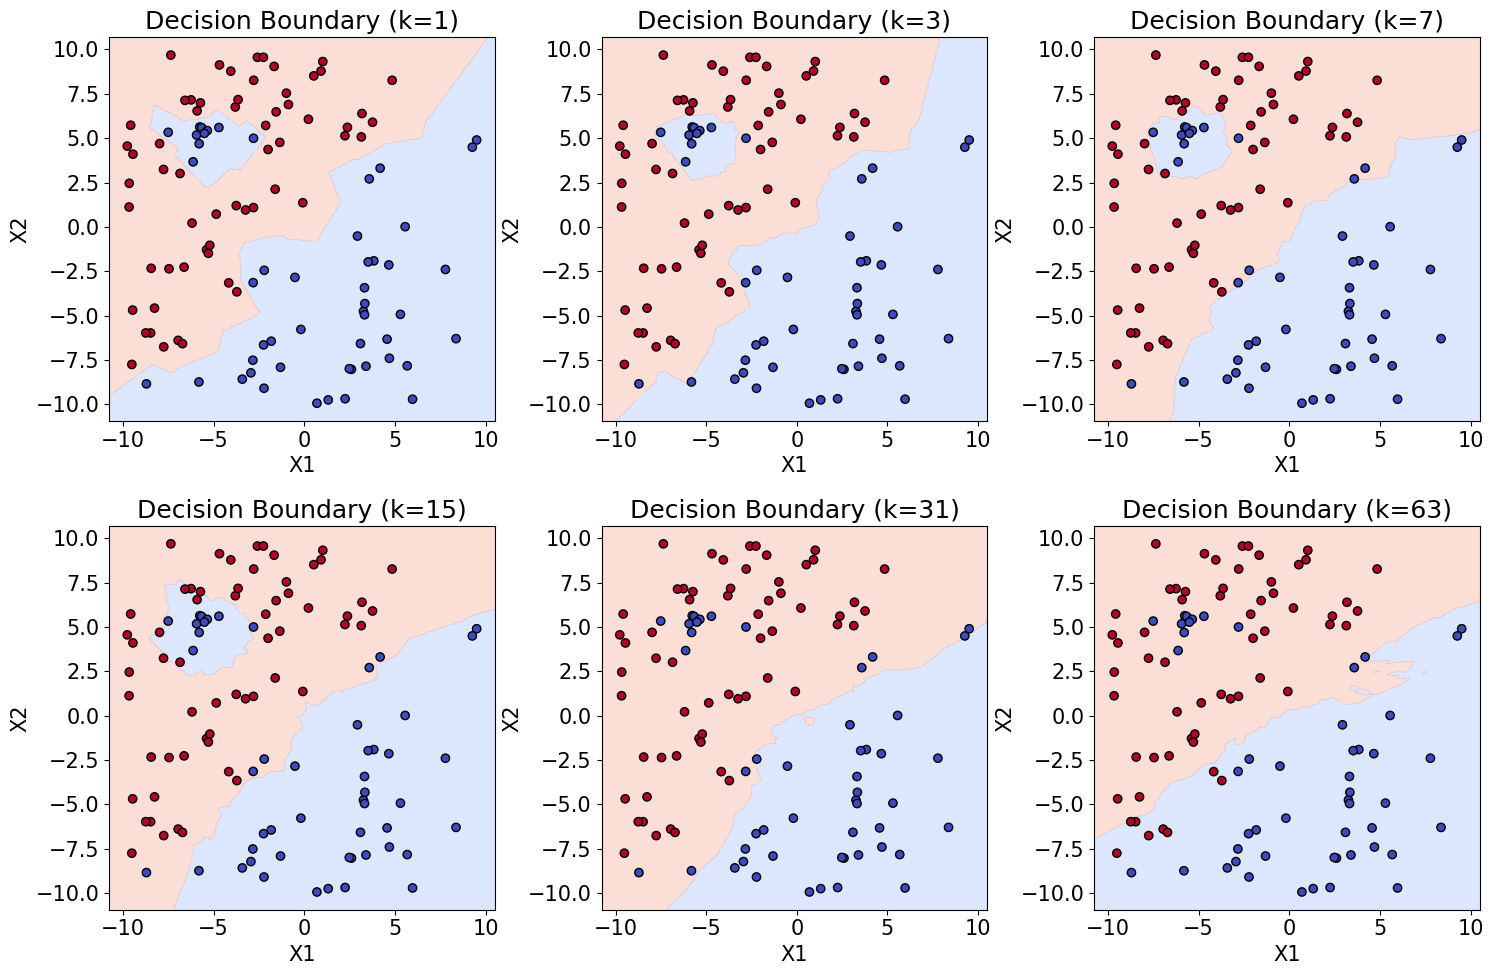

In [37]:
### Solution ###
def plot_decision_boundary(X, y, k_values):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # boundary for each k
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i, k in enumerate(k_values):
        # Predict for all grid points
        predictions = np.array([predict(X, y, point, k) for point in grid_points])
        predictions = predictions.reshape(xx.shape)

        axes[i].contourf(xx, yy, predictions, alpha=0.3, levels=1, cmap='coolwarm')
        axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        axes[i].set_title(f"Decision Boundary (k={k})")
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

    plt.tight_layout()
    plt.show()

k_values = [1, 3, 7, 15, 31, 63]
plot_decision_boundary(X, y, k_values)

**Observations**:

**For small $k (eg: k = 1, 3)$**

The decision boundary is very jagged and closely follows the training data, indicating high variance and potential overfitting. Noise in the data can significantly influence predictions.

**For large $k (eg: k = 31, 63)$**

The decision boundary becomes smoother, generalizing better across the data points. The model might fail to capture the finer details of the data distribution (underfitting).

**Moderate values of $k (eg: k = 7, 15)$** balance smoothness and generalizations. This is often the sweet spot for $k$ in KNN.